In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# The following code is adopted from Pat's Rolling Rain N-Year Threshold.pynb
# Loading in hourly rain data from CSV, parsing the timestamp, and adding it as an index so it's more useful

rain_df = pd.read_csv('data/ohare_hourly_observations.csv')
rain_df['datetime'] = pd.to_datetime(rain_df['datetime'])
rain_df = rain_df.set_index(pd.DatetimeIndex(rain_df['datetime']))
chi_rain_series = rain_df['hourly_precip'].resample('1H').mean()

<IPython.core.display.Javascript object>


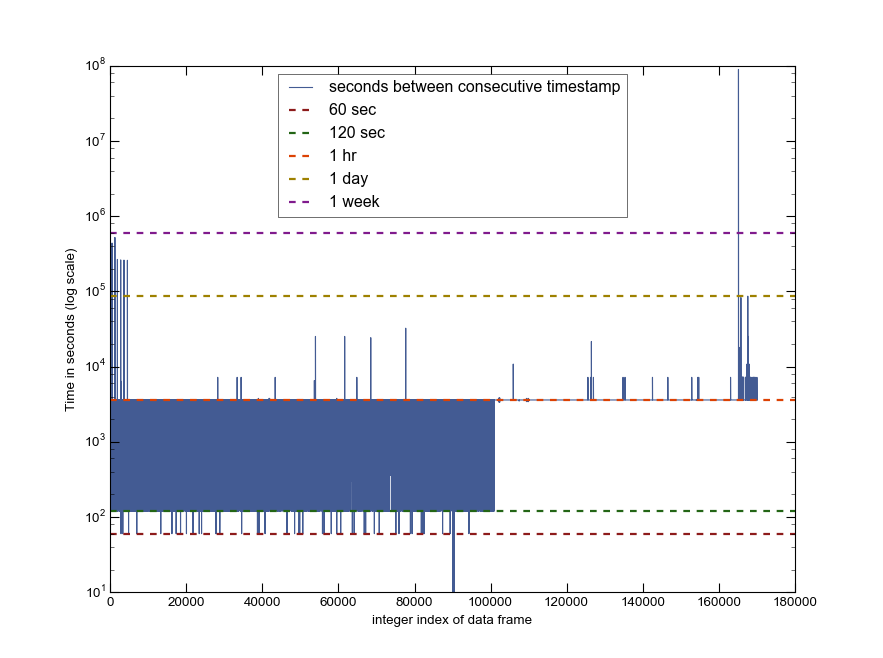

In [4]:
plt.figure()
ax = plt.gca()
ax.plot(np.diff(rain_df.index.astype(np.int64) // 10**9) * -1, lw=1)
ax.hold(True)
ax.plot(ax.get_xlim(), [60, 60], '--')
ax.plot(ax.get_xlim(), [120, 120], '--')
ax.plot(ax.get_xlim(), [3600, 3600], '--')
ax.plot(ax.get_xlim(), [86400, 86400], '--')
ax.plot(ax.get_xlim(), [604800, 604800], '--')
ax.set_yscale('log')
ax.legend(['seconds between consecutive timestamp', '60 sec', '120 sec', '1 hr', '1 day', '1 week'], loc='upper center')
ax.set_ylabel('Time in seconds (log scale)')
ax.set_xlabel('integer index of data frame')

In [5]:
tm = (rain_df.index.astype(np.int64) // 10**9)
large_gaps = np.where(np.diff(tm) < -3600*24)[0]
rain_df.iloc[sorted(np.hstack((large_gaps, large_gaps+1)))]['Unnamed: 0']

2016-08-01 00:51:00    440
2016-07-26 22:51:00    441
2016-07-01 00:51:00    192
2016-06-24 23:51:00    193
2016-06-01 00:51:00    852
2016-05-28 22:51:00    853
2016-05-01 00:42:00    715
2016-04-27 23:51:00    716
2016-04-01 00:14:00    579
2016-03-28 23:51:00    580
2016-03-01 00:51:00    481
2016-02-27 00:51:00    482
2000-01-01 00:56:00    210
1997-02-28 23:56:00    211
Name: Unnamed: 0, dtype: int64